<a href="https://colab.research.google.com/github/farhan1503001/Breast-Cancer-Classification-From-Histopathological-Images/blob/master/Breakhts_effect100_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
x_dataset=[]
y_dataset=[]
src=os.listdir('/content/drive/My Drive/100/benign/')
i=0
for filename in src:
    full_file_name='/content/drive/My Drive/100/benign/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=0
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
src=os.listdir('/content/drive/My Drive/100/malignant/')
i=0
for filename in src:
    full_file_name='/content/drive/My Drive/100/malignant/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=1
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
Y_dataset=Y_dataset.reshape((2081,1))

In [ ]:
from sklearn.utils import shuffle
X_dataset,Y_dataset = shuffle(X_dataset,Y_dataset, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_dataset,Y_dataset,test_size=0.20)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
folds=list(StratifiedShuffleSplit(n_splits=5,random_state=1).split(x_train,y_train))

In [ ]:
Inception=tf.keras.applications.Xception(include_top=False,input_shape=(224,224,3))
input_image=tf.keras.layers.Input((224,224,3))
x=Inception (input_image)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1)(x)
out=tf.keras.layers.Activation(activation='sigmoid')(x)

model=tf.keras.Model(inputs=input_image,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
from matplotlib import pyplot as plt

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=7,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     shear_range=0.2,
                                     zoom_range=0.45,
                                     horizontal_flip=True)
val_datagen = ImageDataGenerator(zoom_range=0.45)

Fold 1
Epoch 1/50
42/42 [==============================] - 36s 706ms/step - loss: 0.5379 - accuracy: 0.7378 - val_loss: 0.8386 - val_accuracy: 0.7297
Epoch 2/50
42/42 [==============================] - 29s 687ms/step - loss: 0.1969 - accuracy: 0.9192 - val_loss: 0.9154 - val_accuracy: 0.7417
Epoch 3/50
42/42 [==============================] - 28s 661ms/step - loss: 0.1520 - accuracy: 0.9468 - val_loss: 1.0989 - val_accuracy: 0.7538
Epoch 4/50
42/42 [==============================] - 29s 675ms/step - loss: 0.1305 - accuracy: 0.9523 - val_loss: 1.5719 - val_accuracy: 0.7447
Epoch 5/50
42/42 [==============================] - 29s 676ms/step - loss: 0.0781 - accuracy: 0.9730 - val_loss: 0.7683 - val_accuracy: 0.8378
Epoch 6/50
42/42 [==============================] - 28s 670ms/step - loss: 0.0892 - accuracy: 0.9650 - val_loss: 0.8378 - val_accuracy: 0.8649
Epoch 7/50
42/42 [==============================] - 28s 670ms/step - loss: 0.0830 - accuracy: 0.9744 - val_loss: 0.0869 - val_accuracy:

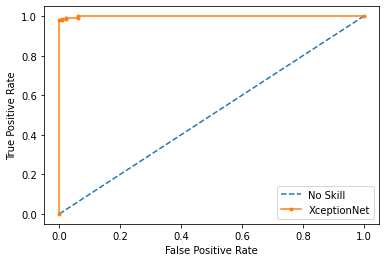

Fold 2
Epoch 1/50
42/42 [==============================] - 29s 674ms/step - loss: 0.0359 - accuracy: 0.9902 - val_loss: 3.8416e-06 - val_accuracy: 1.0000
Epoch 2/50
42/42 [==============================] - 29s 674ms/step - loss: 0.0293 - accuracy: 0.9925 - val_loss: 5.9259e-05 - val_accuracy: 1.0000
Epoch 3/50
42/42 [==============================] - 29s 674ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 9.1536e-06 - val_accuracy: 1.0000
Epoch 4/50
42/42 [==============================] - 29s 675ms/step - loss: 0.0128 - accuracy: 0.9947 - val_loss: 2.3970e-05 - val_accuracy: 1.0000
Epoch 5/50
42/42 [==============================] - 28s 682ms/step - loss: 0.0225 - accuracy: 0.9947 - val_loss: 7.4003e-05 - val_accuracy: 1.0000
Epoch 6/50
42/42 [==============================] - 29s 674ms/step - loss: 0.0112 - accuracy: 0.9955 - val_loss: 6.6390e-04 - val_accuracy: 1.0000
Epoch 7/50
42/42 [==============================] - 28s 673ms/step - loss: 0.0239 - accuracy: 0.9947 - val_loss

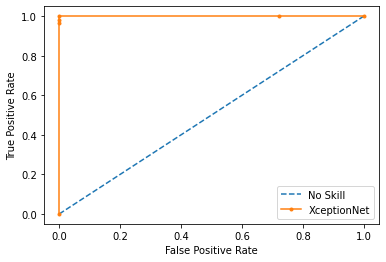

Fold 3
Epoch 1/50
42/42 [==============================] - 29s 675ms/step - loss: 0.0821 - accuracy: 0.9955 - val_loss: 1.9136e-04 - val_accuracy: 1.0000
Epoch 2/50
42/42 [==============================] - 29s 674ms/step - loss: 0.0210 - accuracy: 0.9970 - val_loss: 1.0485e-04 - val_accuracy: 1.0000
Epoch 3/50
42/42 [==============================] - 28s 671ms/step - loss: 0.0221 - accuracy: 0.9947 - val_loss: 2.4042e-05 - val_accuracy: 1.0000
Epoch 4/50
42/42 [==============================] - 28s 670ms/step - loss: 4.9755e-04 - accuracy: 1.0000 - val_loss: 4.8402e-07 - val_accuracy: 1.0000
Epoch 5/50
42/42 [==============================] - 29s 673ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 5.2713e-06 - val_accuracy: 1.0000
Epoch 6/50
42/42 [==============================] - 28s 672ms/step - loss: 0.0033 - accuracy: 0.9985 - val_loss: 6.6475e-08 - val_accuracy: 1.0000
Epoch 7/50
42/42 [==============================] - 28s 672ms/step - loss: 0.0025 - accuracy: 0.9977 - val_

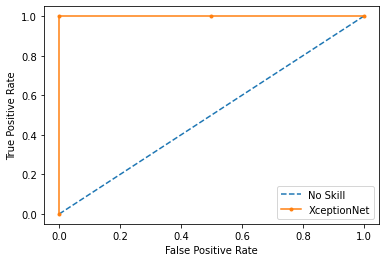

Fold 4
Epoch 1/50
42/42 [==============================] - 29s 697ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 7.5314e-06 - val_accuracy: 1.0000
Epoch 2/50
42/42 [==============================] - 28s 680ms/step - loss: 0.0107 - accuracy: 0.9985 - val_loss: 1.8413e-11 - val_accuracy: 1.0000
Epoch 3/50
42/42 [==============================] - 29s 675ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 9.8132e-08 - val_accuracy: 1.0000
Epoch 4/50
42/42 [==============================] - 28s 672ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 8.8532e-07 - val_accuracy: 1.0000
Epoch 5/50
42/42 [==============================] - 28s 670ms/step - loss: 1.6047e-04 - accuracy: 1.0000 - val_loss: 1.0209e-09 - val_accuracy: 1.0000
Epoch 6/50
42/42 [==============================] - 29s 676ms/step - loss: 3.5346e-04 - accuracy: 1.0000 - val_loss: 3.5129e-06 - val_accuracy: 1.0000
Epoch 7/50
42/42 [==============================] - 29s 673ms/step - loss: 0.0069 - accuracy: 0.9985 - 

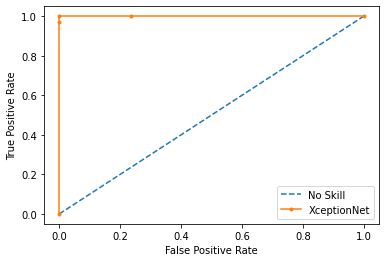

Fold 5
Epoch 1/50
42/42 [==============================] - 32s 750ms/step - loss: 6.2847e-04 - accuracy: 0.9992 - val_loss: 2.1864e-05 - val_accuracy: 1.0000
Epoch 2/50
42/42 [==============================] - 29s 677ms/step - loss: 0.0161 - accuracy: 0.9985 - val_loss: 2.4623e-07 - val_accuracy: 1.0000
Epoch 3/50
42/42 [==============================] - 28s 670ms/step - loss: 1.6068e-05 - accuracy: 1.0000 - val_loss: 1.4274e-06 - val_accuracy: 1.0000
Epoch 4/50
42/42 [==============================] - 28s 670ms/step - loss: 6.8333e-04 - accuracy: 0.9992 - val_loss: 9.6022e-05 - val_accuracy: 1.0000
Epoch 5/50
42/42 [==============================] - 29s 674ms/step - loss: 0.0014 - accuracy: 0.9992 - val_loss: 4.3635e-07 - val_accuracy: 1.0000
Epoch 6/50
42/42 [==============================] - 29s 674ms/step - loss: 2.5019e-04 - accuracy: 1.0000 - val_loss: 1.1956e-06 - val_accuracy: 1.0000
Epoch 7/50
42/42 [==============================] - 29s 675ms/step - loss: 1.0846e-05 - accurac

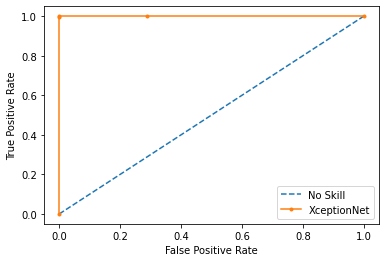

In [ ]:
History=[]
Prescore=[]
Recall=[]
F1=[]
Sensspeci=[]
Roc_auc=[]
for j,(train_idx,val_idx) in enumerate(folds):
    print("Fold "+str(j+1))
    
    x_train=X_dataset[train_idx]
    y_train=Y_dataset[train_idx]
    x_val=X_dataset[val_idx]
    y_val=Y_dataset[val_idx]
    history=model.fit(train_datagen.flow(x_train,y_train),batch_size=32,epochs=50,validation_data=(x_val,y_val))
    y_predict=model.predict(x_val)
    Y_predict=np.float32(y_predict>0.50)
    l=len(y_val)
    Y_predict=np.reshape(Y_predict,(l,1))
    prescore=precision_score(y_val,Y_predict,average='binary')
    recaller=recall_score(y_val,Y_predict,average='binary')
    score=f1_score(y_val,Y_predict,average='binary')
    sensitivity=sensitivity_specificity_support(y_val,Y_predict,average='binary')
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    History.append(history)
    Prescore.append(prescore)
    F1.append(score)
    Recall.append(recaller)
    Sensspeci.append(sensitivity)
    fpr, tpr, thresholds = roc_curve(y_val,y_predict)
    auc = roc_auc_score(y_val, y_predict)
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    print("AUC: ",auc)
    plt.plot([0,1],[0,1], linestyle='--', label='No Skill')
    plt.plot(fpr,tpr, marker='.', label='XceptionNet')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [ ]:
val_acc=History[0].history['val_accuracy']
val_acc1=History[1].history['val_accuracy']
val_acc2=History[2].history['val_accuracy']
val_acc3=History[3].history['val_accuracy']
val_acc4=History[4].history['val_accuracy']
Accuracvalid1=val_acc[49]
Accuracyvalid2=val_acc1[49]
Accuracyvalid3=val_acc2[49]
Accuracyvalid4=val_acc3[49]
Accuracyvalid5=val_acc4[49]
Mean_valid_Accuracy=(Accuracvalid1+Accuracyvalid2+Accuracyvalid3+Accuracyvalid4+Accuracyvalid5)/5.00
print("validation Accuracy for Fold-1 ",Accuracvalid1)
print("validation Accuracy for Fold-2",Accuracyvalid2)
print("Validation Accuracy for Fold-3 ",Accuracyvalid3)
print("Validation Accuracy for Fold-4  ",Accuracyvalid4)
print("Validation Accuracy for Fold-5  ",Accuracyvalid5)
print("Mean Validation Accuracy ",Mean_valid_Accuracy)

validation Accuracy for Fold-1  0.9789789915084839
validation Accuracy for Fold-2 1.0
Validation Accuracy for Fold-3  1.0
Validation Accuracy for Fold-4   1.0
Validation Accuracy for Fold-5   1.0
Mean Validation Accuracy  0.9957957983016967


In [ ]:
print("Printing the precision scores and average of them")
avg=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Prescore[i])
  avg=avg+Prescore[i]

print("Average precision-score ",avg/5.00)

Printing the precision scores and average of them
Precision of Fold - 1 0.9752066115702479
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average precision-score  0.9950413223140495


In [ ]:
print("Printing the recall scores and average of them")
avgr=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Recall[i])
  avgr=avgr+Recall[i]

print("Average precision-score ",avgr/5.00)

Printing the recall scores and average of them
Precision of Fold - 1 0.9957805907172996
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average precision-score  0.99915611814346


In [ ]:
print("Printing the F-1 scores and average of them")
avgf=0.0
for i in range(5):
  print("Precision of Fold -",i+1,F1[i])
  avgf=avgf+F1[i]

print("Average f1-score ",avgf/5.00)

Printing the F-1 scores and average of them
Precision of Fold - 1 0.9853862212943632
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average f1-score  0.9970772442588727


In [ ]:
print("Printing the sensitivity scores and average of them")
avgsen=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Sensspeci[i][0])
  avgsen=avgsen+Sensspeci[i][0]

print("Average sensitivity-score ",avgsen/5.00)

Printing the sensitivity scores and average of them
Precision of Fold - 1 0.9957805907172996
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average sensitivity-score  0.99915611814346


In [ ]:
print("Printing the specificity scores and average of them")
avgsp=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Sensspeci[i][1])
  avgsp=avgsp+Sensspeci[i][1]

print("Average specificity-score ",avgsp/5.00)

Printing the specificity scores and average of them
Precision of Fold - 1 0.9375
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average specificity-score  0.9875


In [ ]:
y_predict1=model.predict(x_test)
predict=np.float32(y_predict1>0.50)
predict=np.reshape(predict,(417,1))
print(predict)

[[1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
metrics=confusion_matrix(y_test,predict)
print(metrics)

[[143   1]
 [  0 273]]


In [ ]:
from sklearn.metrics import auc,roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_predict1)
auc = roc_auc_score(y_test, y_predict)

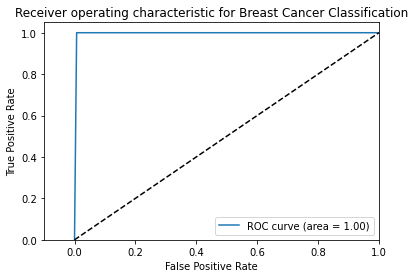

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Breast Cancer Classification')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

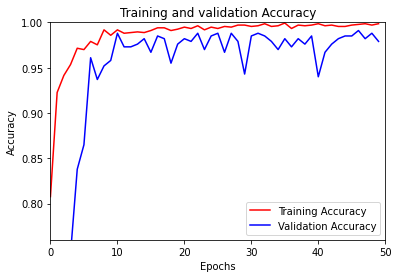

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc=History[0].history['accuracy']
val_acc=History[0].history['val_accuracy']
loss=History[0].history['loss']
val_loss=History[0].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

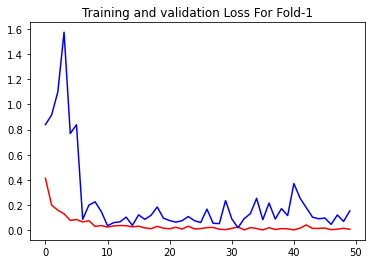

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-1")
plt.figure()

<Figure size 432x288 with 0 Axes>

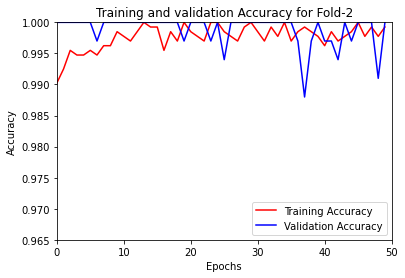

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc=History[1].history['accuracy']
val_acc=History[1].history['val_accuracy']
loss=History[1].history['loss']
val_loss=History[1].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.965,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy for Fold-2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

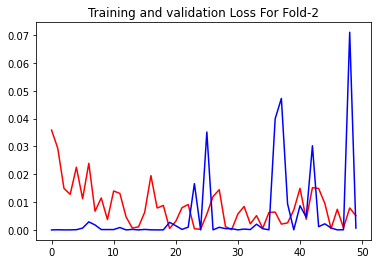

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-2")
plt.figure()

<Figure size 432x288 with 0 Axes>

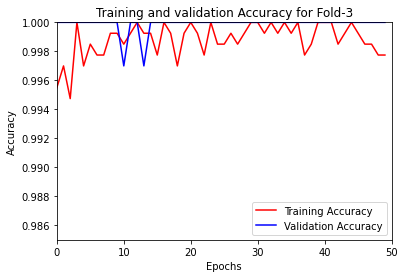

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[2].history['accuracy']
val_acc=History[2].history['val_accuracy']
loss=History[2].history['loss']
val_loss=History[2].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.9850,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy for Fold-3")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

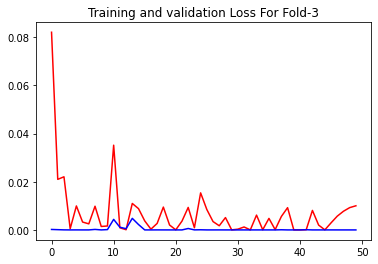

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-3")
plt.figure()

<Figure size 432x288 with 0 Axes>

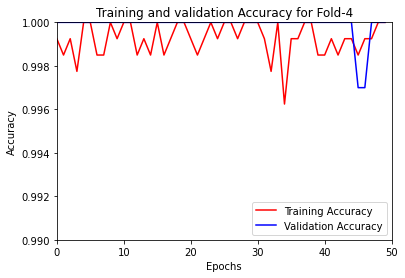

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[3].history['accuracy']
val_acc=History[3].history['val_accuracy']
loss=History[3].history['loss']
val_loss=History[3].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.99,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy for Fold-4")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

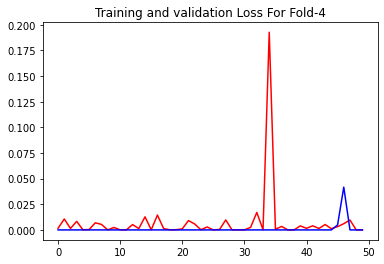

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-4")
plt.figure()

<Figure size 432x288 with 0 Axes>

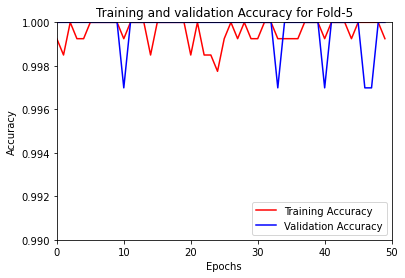

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[4].history['accuracy']
val_acc=History[4].history['val_accuracy']
loss=History[4].history['loss']
val_loss=History[4].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.99,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy for Fold-5")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

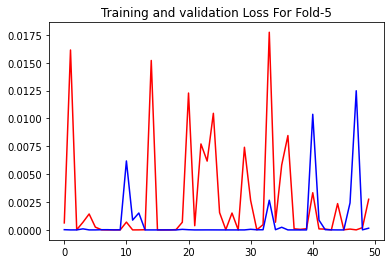

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-5")
plt.figure()